In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory
from oqtant.schemas.quantum_matter import QuantumMatter as qm
from oqtant.schemas.output import Gaussian_dist_2D
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.optimize as opt
from IPython.display import HTML

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│           100 │               100 │                100 │                 38 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [13]:
positions = np.arange(-60,60)
positions

array([-60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
       -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
       -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
        -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59])

In [50]:
def potential(U_l, d_l, U_s, d_s, phi, z):
    z_dl = 2*np.pi*z/d_l
    z_ds = 2*np.pi*z/d_s + phi
    UU_l = U_l/2*np.cos(z_dl)
    UU_s = U_s/2*np.cos(z_ds)
    U_z = -UU_l - UU_s
    return U_z + 1.0
p = potential(1,6,1,2,0.5,positions)

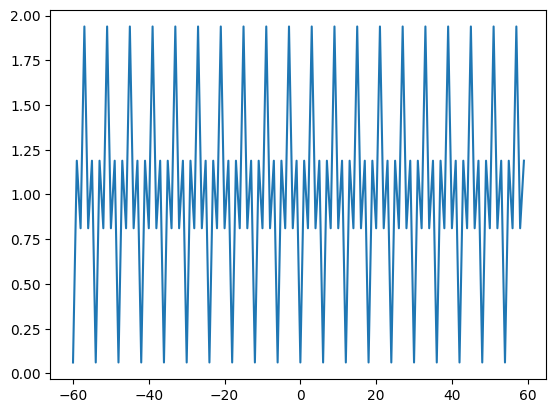

In [51]:
plt.plot(positions, p)

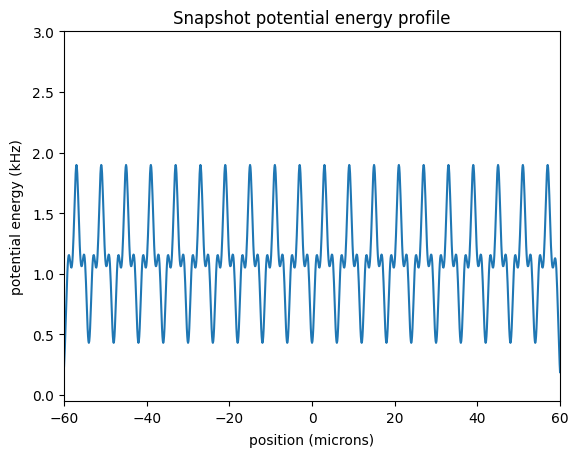

In [52]:
snapshot_zero = qmf.create_snapshot(
    time=0, positions=positions, potentials=p, interpolation="SLINEAR"
)
snapshot_zero.show_potential(xlimits=[-60, 60], ylimits=[-0.05, 3])